In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv("C:/Users/sivay/Downloads/eth.csv", parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
print(df.head())
df.columns

(1742, 38)
            AdrActCnt  BlkCnt  BlkSizeByte  BlkSizeMeanByte  CapMrktCurUSD  \
date                                                                         
2015-07-30       9206    6911      4449897       643.886124            NaN   
2015-07-31        424    6863      3994458       582.027976            NaN   
2015-08-01        413    5293      3044344       575.164179            NaN   
2015-08-02        432    5358      3112348       580.878686            NaN   
2015-08-03        444    5280      3099953       587.112311            NaN   

                DiffMean  FeeMeanNtv  FeeMeanUSD  FeeMedNtv  FeeMedUSD  ...  \
date                                                                    ...   
2015-07-30  1.213355e+11         NaN         NaN        NaN        NaN  ...   
2015-07-31  6.029419e+11         NaN         NaN        NaN        NaN  ...   
2015-08-01  8.872542e+11         NaN         NaN        NaN        NaN  ...   
2015-08-02  1.020254e+12         NaN         Na

Index(['AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv',
       'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj',
       'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur',
       'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

In [3]:

df

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2015-07-30,9206,6911,4449897,643.886124,NaN,1.213355e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
2015-07-31,424,6863,3994458,582.027976,NaN,6.029419e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
2015-08-01,413,5293,3044344,575.164179,NaN,8.872542e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
2015-08-02,432,5358,3112348,580.878686,NaN,1.020254e+12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
2015-08-03,444,5280,3099953,587.112311,NaN,1.125837e+12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,404034,6475,167637394,25889.945019,2.355864e+10,2.318620e+15,0.000825,0.175456,0.000383,0.081411,...,3.078319e+08,3.836976,816.177129,0.050070,10.650669,1.786807e+06,3.800782e+08,0.064073,0.052622,0.097412
2020-05-02,398595,6471,154402713,23860.719054,2.371886e+10,2.330873e+15,0.000678,0.145172,0.000291,0.062254,...,2.503112e+08,3.179830,680.909340,0.050000,10.706694,1.483426e+06,3.176517e+08,0.064054,0.052456,0.097343
2020-05-03,401201,6421,159384121,24822.320667,2.327385e+10,2.279571e+15,0.000762,0.160151,0.000329,0.069065,...,2.599497e+08,3.344468,702.641257,0.047650,10.010816,1.539114e+06,3.233534e+08,0.064059,0.052774,0.097372


In [4]:

df.isnull().sum()

AdrActCnt            0
BlkCnt               0
BlkSizeByte          0
BlkSizeMeanByte      0
CapMrktCurUSD        9
DiffMean             0
FeeMeanNtv           8
FeeMeanUSD           9
FeeMedNtv            8
FeeMedUSD            9
FeeTotNtv            0
FeeTotUSD            9
HashRate             0
IssContNtv           0
IssContPctAnn        0
IssContUSD           9
IssTotNtv            0
IssTotUSD            9
NVTAdj               8
NVTAdj90            98
PriceBTC             9
PriceUSD             9
ROI1yr             374
ROI30d              39
SplyCur              0
TxCnt                0
TxTfrCnt             0
TxTfrValAdjNtv       0
TxTfrValAdjUSD       9
TxTfrValMeanNtv      8
TxTfrValMeanUSD      9
TxTfrValMedNtv       8
TxTfrValMedUSD       9
TxTfrValNtv          0
TxTfrValUSD          9
VtyDayRet180d      189
VtyDayRet30d        39
VtyDayRet60d        69
dtype: int64

In [5]:

df= df.drop(['ROI1yr','ROI1yr','VtyDayRet180d','VtyDayRet30d','VtyDayRet60d','FeeMeanNtv','FeeMeanUSD','NVTAdj','FeeMedUSD',
       'FeeTotUSD','TxTfrValUSD','IssContUSD','IssTotUSD','ROI30d',
      'TxTfrValAdjUSD','TxTfrValMeanNtv','TxTfrValMeanUSD','TxTfrValMedNtv','TxTfrValMedUSD','NVTAdj90','CapMrktCurUSD','FeeMedNtv'], axis=1)


In [6]:
df.isnull().sum()

AdrActCnt          0
BlkCnt             0
BlkSizeByte        0
BlkSizeMeanByte    0
DiffMean           0
FeeTotNtv          0
HashRate           0
IssContNtv         0
IssContPctAnn      0
IssTotNtv          0
PriceBTC           9
PriceUSD           9
SplyCur            0
TxCnt              0
TxTfrCnt           0
TxTfrValAdjNtv     0
TxTfrValNtv        0
dtype: int64

In [7]:
df.dropna(inplace=True)
#df.reset_index(drop=True, inplace=True)
#df.PriceUSD= df.PriceUSD.astype(np.int64)

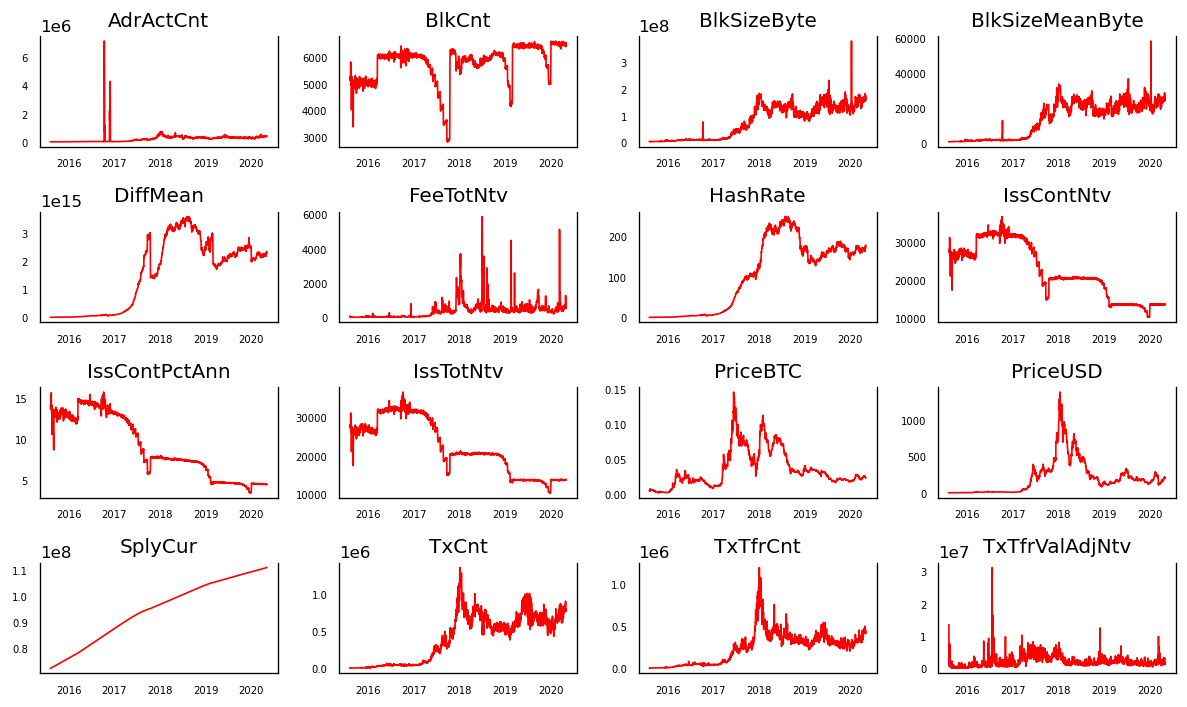

In [9]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=4, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

C:\Users\sivay\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\sivay\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\sivay\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\sivay\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\sivay\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covaria

,AdrActCnt_x,BlkCnt_x,BlkSizeByte_x,BlkSizeMeanByte_x,DiffMean_x,FeeTotNtv_x,HashRate_x,IssContNtv_x,IssContPctAnn_x,IssTotNtv_x,PriceBTC_x,PriceUSD_x,SplyCur_x,TxCnt_x,TxTfrCnt_x,TxTfrValAdjNtv_x,TxTfrValNtv_x
AdrActCnt_y,1.0000,0.0022,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0032,0.0000,0.0000,0.0000,0.0000,0.2111,0.8957
BlkCnt_y,0.1520,1.0000,0.0757,0.0510,0.0000,0.0048,0.0000,0.0000,0.0000,0.0000,0.0714,0.3512,0.0000,0.1014,0.2709,0.1151,0.1945
BlkSizeByte_y,0.2018,0.0791,1.0000,0.0007,0.0000,0.0197,0.0000,0.0000,0.0000,0.0000,0.1493,0.0007,0.0000,0.0000,0.0000,0.0614,0.1932
BlkSizeMeanByte_y,0.2320,0.0000,0.0000,1.0000,0.0000,0.0128,0.0000,0.0000,0.0000,0.0000,0.0515,0.0001,0.0000,0.0000,0.0000,0.0554,0.2811
DiffMean_y,0.2123,0.0658,0.0007,0.0044,1.0000,0.0000,0.0139,0.0438,0.2264,0.0438,1.0000,0.0000,0.0869,0.0000,0.0000,0.0327,0.0117
FeeTotNtv_y,0.0002,0.2656,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2269,0.1487
HashRate_y,0.2157,0.0030,0.0000,0.0000,1.0000,0.0000,1.0000,0.1839,0.1878,0.1839,0.0000,0.0000,0.2281,0.0000,0.0000,0.0016,0.0012
IssContNtv_y,0.0000,0.0006,0.0033,0.0024,0.0000,0.2887,0.0000,1.0000,0.0002,1.0000,0.1503,0.5062,0.0009,0.0157,0.1062,0.0015,0.0165
IssContPctAnn_y,0.0001,0.0043,0.0037,0.0023,1.0000,0.3581,0.0006,0.0010,1.0000,0.0010,0.2272,0.5294,0.0000,0.0203,0.1281,0.0007,0.0294
IssTotNtv_y,0.0000,0.0006,0.0033,0.0024,0.0000,0.2887,0.0000,1.0000,0.0002,1.0000,0.1503,0.5062,0.0009,0.0157,0.1062,0.0015,0.0165


In [12]:
df

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,FeeTotNtv,HashRate,IssContNtv,IssContPctAnn,IssTotNtv,PriceBTC,PriceUSD,SplyCur,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValNtv
date,,,,,,,,,,,,,,,,,
2015-08-08,1208,5256,3508878,667.594749,1.586124e+12,68.099970,0.096483,27943.43750,14.105457,27943.43750,0.004590,1.199990,7.230786e+07,2881,2663,1.341569e+07,1.358411e+07
2015-08-09,1113,5123,3167541,618.298068,1.709480e+12,14.098950,0.101360,27178.28125,13.714062,27178.28125,0.004505,1.199990,7.233504e+07,1329,1266,1.027865e+06,1.166350e+06
2015-08-10,1430,5255,3316883,631.186108,1.837696e+12,31.165144,0.111855,27817.34375,14.031135,27817.34375,0.004529,1.199990,7.236286e+07,2037,2078,1.452359e+06,1.672435e+06
2015-08-11,2697,5280,3653834,692.014015,2.036391e+12,11.311449,0.124450,28027.81250,14.131822,28027.81250,0.003647,0.990000,7.239089e+07,4963,5047,1.202100e+06,1.487259e+06
2015-08-12,1219,5124,3348157,653.426425,2.207080e+12,32.586992,0.130915,27370.93750,13.795405,27370.93750,0.004803,1.288000,7.241826e+07,2036,1968,6.365810e+05,7.523290e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,404034,6475,167637394,25889.945019,2.318620e+15,682.262527,173.805920,13794.75000,4.546075,13794.75000,0.024020,212.713618,1.107529e+08,827138,465681,1.447166e+06,1.786807e+06
2020-05-02,398595,6471,154402713,23860.719054,2.330873e+15,519.301519,174.573975,13642.62500,4.495705,13642.62500,0.023853,214.133871,1.107665e+08,765990,466511,1.168947e+06,1.483426e+06
2020-05-03,401201,6421,159384121,24822.320667,2.279571e+15,601.976981,169.406328,13566.18750,4.469790,13566.18750,0.023614,210.090575,1.107801e+08,789689,460197,1.237322e+06,1.539114e+06


PriceUSD - FeeTotNtv_x, TxCnt_x,	TxTfrCnt_x, TxTfrValAdjNtv_x,TxTfrValNtv_x, BlkSizeByte_x,BlkSizeMeanByte_x have a relation as per the above table.